In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv("data/Iris.csv")
df = df.drop('Unnamed: 0', axis=1)
y_col = 'Class'
y = df[y_col]
X = df[df.columns.drop(y_col)]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle= True, random_state=42)

In [57]:
from sklearn import preprocessing

In [58]:
from sklearn.preprocessing import StandardScaler  
sc=StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

1

In [59]:
from sklearn.neighbors import KDTree
from sklearn.metrics import accuracy_score

In [60]:
def most_frequent(List : list):
    return max(set(List), key = List.count)

arr_error=[]
kdtree = KDTree(X_train)
for kval in range(1,31):
    dist, ind = kdtree.query(X_test,k=kval)
    test_pred=[]
    for row in ind:
        res = most_frequent(y_train.loc[y_train.index[row]].tolist())
        test_pred.append(res)
    test_pred = pd.DataFrame(test_pred)
    print(f"accuracy score for k={kval}: ",accuracy_score(test_pred,y_test))
    arr_error.append(1 - accuracy_score(test_pred,y_test))

accuracy score for k=1:  1.0
accuracy score for k=2:  1.0
accuracy score for k=3:  1.0
accuracy score for k=4:  1.0
accuracy score for k=5:  1.0
accuracy score for k=6:  1.0
accuracy score for k=7:  0.9666666666666667
accuracy score for k=8:  1.0
accuracy score for k=9:  1.0
accuracy score for k=10:  1.0
accuracy score for k=11:  1.0
accuracy score for k=12:  1.0
accuracy score for k=13:  1.0
accuracy score for k=14:  1.0
accuracy score for k=15:  1.0
accuracy score for k=16:  1.0
accuracy score for k=17:  1.0
accuracy score for k=18:  1.0
accuracy score for k=19:  1.0
accuracy score for k=20:  1.0
accuracy score for k=21:  1.0
accuracy score for k=22:  1.0
accuracy score for k=23:  1.0
accuracy score for k=24:  1.0
accuracy score for k=25:  1.0
accuracy score for k=26:  1.0
accuracy score for k=27:  1.0
accuracy score for k=28:  1.0
accuracy score for k=29:  1.0
accuracy score for k=30:  1.0


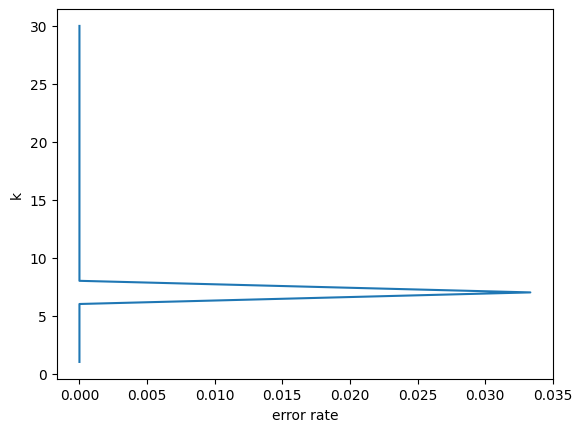

In [61]:
import matplotlib.pyplot as plt
X_error = [i for i in arr_error]
Y_error = [i for i in range (1,31)]

plt.plot(X_error, Y_error)
plt.xlabel('error rate')
plt.ylabel('k')
#     plt.title('My first graph!')
plt.show()

The error rate is zero in all k-values except for 7, which has a very tiny error rate.

2

In [62]:
from sklearn.neighbors import BallTree
arr_error=[]

balltree = BallTree(X_train)

for kval in range(1,31):
    dist, ind = balltree.query(X_test,k=kval)
    test_pred=[]
    for row in query_indices:
        res = most_frequent(y_train.loc[y_train.index[row]].tolist())
        test_pred.append(res)
    test_pred = pd.DataFrame(test_pred)
    print(f"accuracy score for k={kval}: ",accuracy_score(test_pred,y_test))
    arr_error.append(1 - accuracy_score(test_pred,y_test))


accuracy score for k=1:  1.0
accuracy score for k=2:  1.0
accuracy score for k=3:  1.0
accuracy score for k=4:  1.0
accuracy score for k=5:  1.0
accuracy score for k=6:  1.0
accuracy score for k=7:  1.0
accuracy score for k=8:  1.0
accuracy score for k=9:  1.0
accuracy score for k=10:  1.0
accuracy score for k=11:  1.0
accuracy score for k=12:  1.0
accuracy score for k=13:  1.0
accuracy score for k=14:  1.0
accuracy score for k=15:  1.0
accuracy score for k=16:  1.0
accuracy score for k=17:  1.0
accuracy score for k=18:  1.0
accuracy score for k=19:  1.0
accuracy score for k=20:  1.0
accuracy score for k=21:  1.0
accuracy score for k=22:  1.0
accuracy score for k=23:  1.0
accuracy score for k=24:  1.0
accuracy score for k=25:  1.0
accuracy score for k=26:  1.0
accuracy score for k=27:  1.0
accuracy score for k=28:  1.0
accuracy score for k=29:  1.0
accuracy score for k=30:  1.0


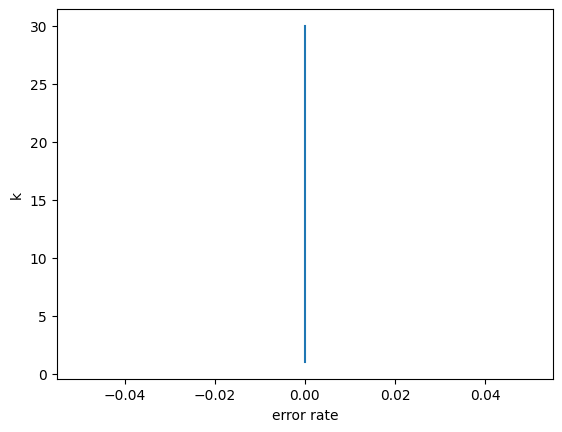

In [63]:
X_error = [i for i in arr_error]
Y_error = [i for i in range (1,31)]

plt.plot(X_error, Y_error)
plt.xlabel('error rate')
plt.ylabel('k')
#     plt.title('My first graph!')
plt.show()

Ball tree returned all of the predictions accurately :)

    KD-tree (K-Dimensional Tree): KD-tree is a binary tree that partitions the data points along the median of a selected axis at each level of the tree. The axis to split is chosen alternately as the tree is built, typically starting with the axis that has the largest variance in the data. The median value along the selected axis is used as the splitting value, creating two child nodes representing points smaller and larger than the median along that axis. This process is recursively applied until each node contains only one data point, resulting in a balanced tree.

    Ball tree (Bounding Ball Tree): Ball tree is a binary tree where each node represents a bounding sphere that encloses a set of data points. The data points are partitioned into two disjoint subsets based on their distance to the centroid of the bounding sphere. The centroid is calculated as the average of the data points within the bounding sphere, and the radius is set to the maximum distance from the centroid to any data point within the bounding sphere. The bounding sphere is split into two child nodes, each containing a subset of the data points based on their distances to the centroid. This process is recursively applied until each node contains a small number of data points or a maximum depth is reached, resulting in a balanced or near-balanced tree.
Both KD-tree and Ball tree allow for efficient search and retrieval operations by recursively partitioning the data points in a way that enables pruning of unnecessary subtrees during queries. The choice of splitting axis or splitting value in KD-tree, and the centroid and radius in Ball tree, determines the shape and size of the partitions, which affects the efficiency of the data structure in terms of construction time, query time, space efficiency, and handling of high-dimensional data.

 KD-tree is generally preferred for low-dimensional data and faster construction time, while Ball tree is often preferred for high-dimensional data and faster query time. 